Code reference for circular bar plots : https://python-graph-gallery.com/circular-barplot/ 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
color1 = ["#a6cee3"]*3 + ["#e31a1c"]*2 + ["#b2df8a"]*6 + ["#fdbf6f"]*3 + ["#cab2d6"]*6 


In [6]:
df_astera=pd.read_csv('../astera/astera_100dopc_prolint.csv', sep='\t')
df_astera_ordered=df_astera[df_astera.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_astera_ordered_select=df_astera_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_astera_grouped=df_astera_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_astera_grouped.to_csv('astera.csv',sep='\t')
df_astera_f=pd.read_csv('astera.csv',sep='\t')
df_astera_f=df_astera_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_astera_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_astera_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.1385
1,R,ARG,0.0365
8,H,HIS,0.0095
3,D,ASP,0.0200
6,E,GLU,0.0095
15,S,SER,0.1240
16,T,THR,0.0055
4,C,CYS,0.0035
14,P,PRO,0.0655
2,N,ASN,0.0325


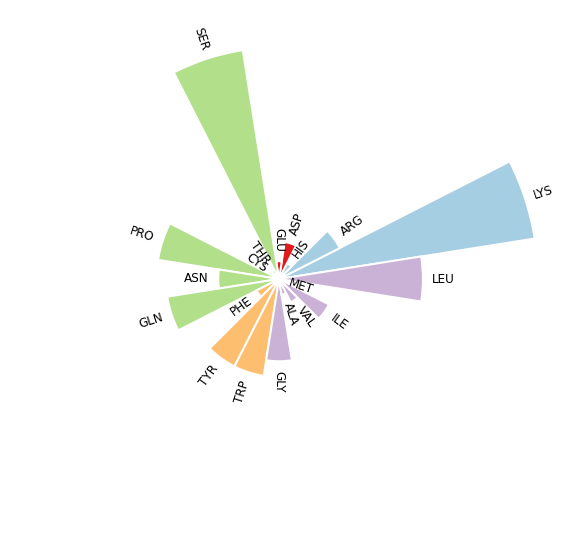

In [54]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)
ax.set_facecolor('white')

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_astera_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_astera_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_astera_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_astera_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.005

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_astera_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('astera.png',dpi=330,transparent=False)

In [7]:
from pylab import *

cmap = cm.get_cmap('Paired',10)    # PiYG

for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#a6cee3
#1f78b4
#b2df8a
#fb9a99
#e31a1c
#fdbf6f
#cab2d6
#6a3d9a
#ffff99
#b15928


In [8]:
df_asterc=pd.read_csv('../asterc/asterc_100dopc_prolint.csv', sep='\t')
df_asterc_ordered=df_asterc[df_asterc.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_asterc_ordered_select=df_asterc_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_asterc_grouped=df_asterc_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_asterc_grouped.to_csv('asterc.csv',sep='\t')
df_asterc_f=pd.read_csv('asterc.csv',sep='\t')
df_asterc_f=df_asterc_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_asterc_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_asterc_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.3515
1,R,ARG,0.0305
8,H,HIS,0.0830
3,D,ASP,0.0530
6,E,GLU,0.0255
15,S,SER,0.2510
16,T,THR,0.1030
4,C,CYS,0.0075
14,P,PRO,0.1505
2,N,ASN,0.1260


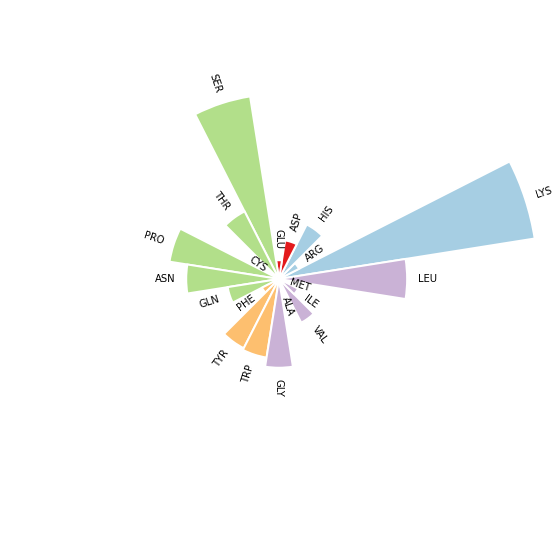

In [380]:


# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_asterc_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_asterc_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_asterc_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_asterc_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.015

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_asterc_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('asterc.png',dpi=330)

In [9]:
df_cptp=pd.read_csv('../cptp/cptp_100dopc_prolint.dat', sep='\t')
df_cptp_ordered=df_cptp[df_cptp.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_cptp_ordered_select=df_cptp_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_cptp_grouped=df_cptp_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_cptp_grouped.to_csv('cptp.csv',sep='\t')
df_cptp_f=pd.read_csv('cptp.csv',sep='\t')
df_cptp_f=df_cptp_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_cptp_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_cptp_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.0570
1,R,ARG,0.2080
8,H,HIS,0.0645
3,D,ASP,0.0235
6,E,GLU,0.0295
15,S,SER,0.1065
16,T,THR,0.1650
4,C,CYS,0.0645
14,P,PRO,0.0865
2,N,ASN,0.0550


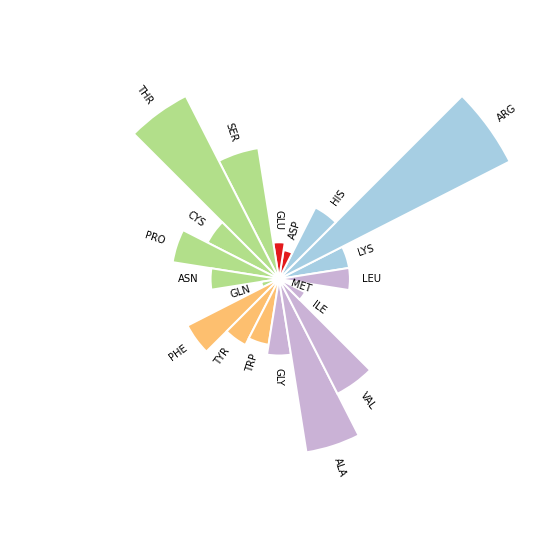

In [382]:


# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_cptp_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_cptp_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_cptp_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_cptp_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.01

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_cptp_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('cptp.png',dpi=330)

In [10]:
df_fabp=pd.read_csv('../fabp/fabp_100dopc_prolint.csv', sep='\t')
df_fabp_ordered=df_fabp[df_fabp.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_fabp_ordered_select=df_fabp_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_fabp_grouped=df_fabp_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_fabp_grouped.to_csv('fabp.csv',sep='\t')
df_fabp_f=pd.read_csv('fabp.csv',sep='\t')
df_fabp_f=df_fabp_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_fabp_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_fabp_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.1170
1,R,ARG,0.0350
8,H,HIS,0.0210
3,D,ASP,0.0380
6,E,GLU,0.0100
15,S,SER,0.0660
16,T,THR,0.1255
4,C,CYS,0.0010
14,P,PRO,0.0015
2,N,ASN,0.0240


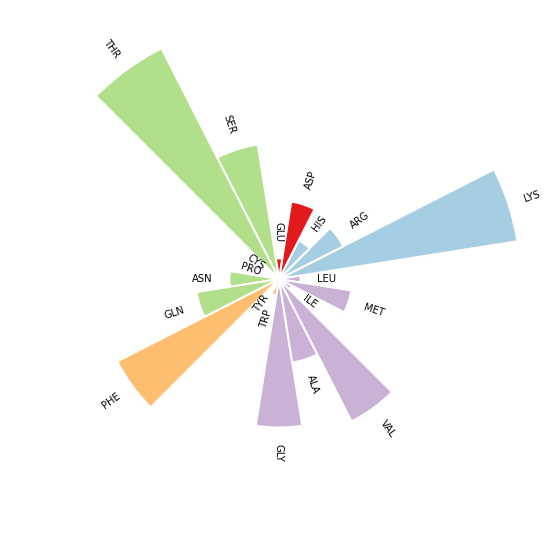

In [384]:

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_fabp_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_fabp_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_fabp_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_fabp_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.008

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_fabp_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('fabp.png',dpi=330)

In [11]:
df_gm2a=pd.read_csv('../gm2a/gm2a_100dopc_prolint.csv', sep='\t')
df_gm2a_ordered=df_gm2a[df_gm2a.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_gm2a_ordered_select=df_gm2a_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_gm2a_grouped=df_gm2a_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_gm2a_grouped.to_csv('gm2a.csv',sep='\t')
df_gm2a_f=pd.read_csv('gm2a.csv',sep='\t')
df_gm2a_f=df_gm2a_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_gm2a_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_gm2a_f

,Letter,ResName,Longest_Duration
11,K,MET,0.1125
1,R,ARG,0.0310
8,H,ILE,0.8485
3,D,ASP,1.0405
6,E,GLY,0.1590
15,S,THR,1.3470
16,T,TRP,0.2695
4,C,CYS,0.7030
14,P,SER,1.1510
2,N,ASN,0.0395


In [401]:
df_gm2a

,Unnamed: 0,Mean_Duration,Longest_Duration,Sum_of_all_Contacts,Lipid_Number,Normalized_Lipid_Number,Occupancy,Protein,Lipids,Radius,ResID,ResName
0,0,0.005210,0.0365,5.3510,0.222958,0.222958,12.541405,Protein0,DOPC,0.7,1,HIS
1,1,0.004458,0.0345,3.7540,0.156417,0.156417,12.672653,Protein0,DOPC,0.7,2,MET
2,2,0.000916,0.0050,0.1090,0.004542,0.004542,0.414575,Protein0,DOPC,0.7,3,SER
3,3,0.000577,0.0010,0.0075,0.000313,0.000313,0.031249,Protein0,DOPC,0.7,4,SER
4,4,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,Protein0,DOPC,0.7,5,PHE
...,...,...,...,...,...,...,...,...,...,...,...,...
159,159,0.000724,0.0025,0.0825,0.003438,0.003438,0.343743,Protein0,DOPC,0.7,160,SER
160,160,0.000703,0.0040,0.0675,0.002812,0.002812,0.279161,Protein0,DOPC,0.7,161,LEU
161,161,0.002416,0.0250,1.8945,0.078937,0.078937,6.410283,Protein0,DOPC,0.7,162,LYS
162,162,0.001361,0.0075,0.7755,0.032313,0.032313,3.162434,Protein0,DOPC,0.7,163,GLY


In [12]:
#if all amino acids are present, 11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10
#                             = LYS,ARG,HIS,ASP,GLU,SER,THR,CYS,PRO,ASN,GLN,PHE,TYR,TRP,GLY,ALA,VAL,ILE,MET,LEU

#Here GLN is missing, introduce a line for it at the appropriate postion, like here row 5 must have been GLN, thus 
#insert row at 4.5 and then reset index so 4.5 becomes the new 5
df_gm2a_f=pd.read_csv('gm2a.csv',sep='\t')
df_gm2a_f.loc[4.5] = 'GLN', 0.0
df_gm2a_f = df_gm2a_f.sort_index().reset_index(drop=True)
df_gm2a_f=df_gm2a_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_gm2a_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_gm2a_f


,Letter,ResName,Longest_Duration
11,K,LYS,0.4255
1,R,ARG,0.0310
8,H,HIS,0.1020
3,D,ASP,1.0405
6,E,GLU,1.3510
15,S,SER,1.1510
16,T,THR,1.3470
4,C,CYS,0.7030
14,P,PRO,1.8530
2,N,ASN,0.0395


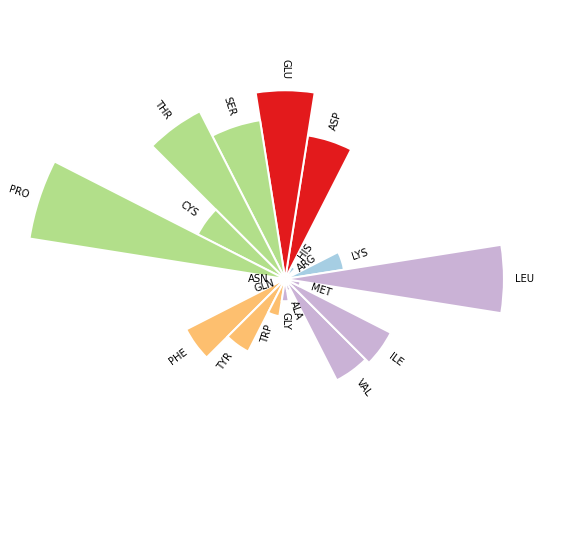

In [394]:


# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_gm2a_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_gm2a_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_gm2a_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_gm2a_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.08

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_gm2a_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('gm2a.png',dpi=330)
plt.show()

In [13]:
df_lcn1=pd.read_csv('../lcn1/lcn1_100dopc_prolint.csv', sep='\t')
df_lcn1_ordered=df_lcn1[df_lcn1.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_lcn1_ordered_select=df_lcn1_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_lcn1_grouped=df_lcn1_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_lcn1_grouped.to_csv('lcn1.csv',sep='\t')
df_lcn1_f=pd.read_csv('lcn1.csv',sep='\t')
df_lcn1_f=df_lcn1_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_lcn1_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_lcn1_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.0320
1,R,ARG,0.0335
8,H,HIS,0.0175
3,D,ASP,0.0070
6,E,GLU,0.0320
15,S,SER,0.0240
16,T,THR,0.0195
4,C,CYS,0.0055
14,P,PRO,0.0105
2,N,ASN,0.0065


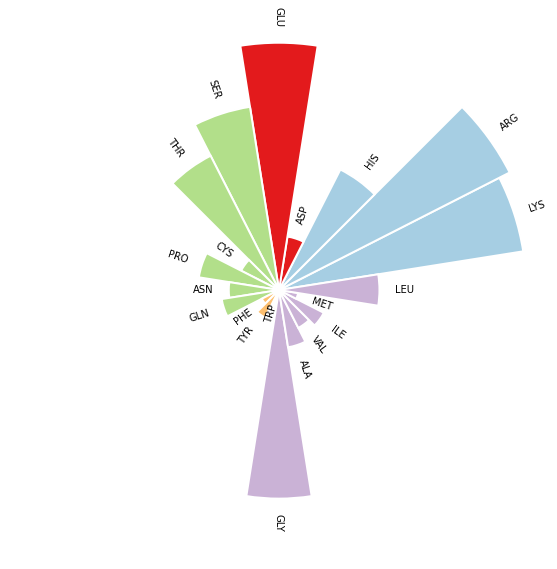

In [275]:

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_lcn1_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_lcn1_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_lcn1_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_lcn1_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.002

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_lcn1_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('lcn1.png',dpi=330)

In [40]:
df_osh4=pd.read_csv('../osh4/osh4_100dopc_prolint.csv', sep='\t')
df_osh4_ordered=df_osh4[df_osh4.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_osh4_ordered_select=df_osh4_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_osh4_grouped=df_osh4_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_osh4_grouped.to_csv('osh4.csv',sep='\t')
df_osh4_f=pd.read_csv('osh4.csv',sep='\t')
df_osh4_f=df_osh4_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_osh4_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
if df_osh4_f.shape[0]<20:
    print("MISSING AMINOACID")
df_osh4_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.0715
1,R,ARG,0.0075
8,H,HIS,0.0060
3,D,ASP,0.0090
6,E,GLU,0.0460
15,S,SER,0.0435
16,T,THR,0.0110
4,C,CYS,0.0010
14,P,PRO,0.0105
2,N,ASN,0.0080


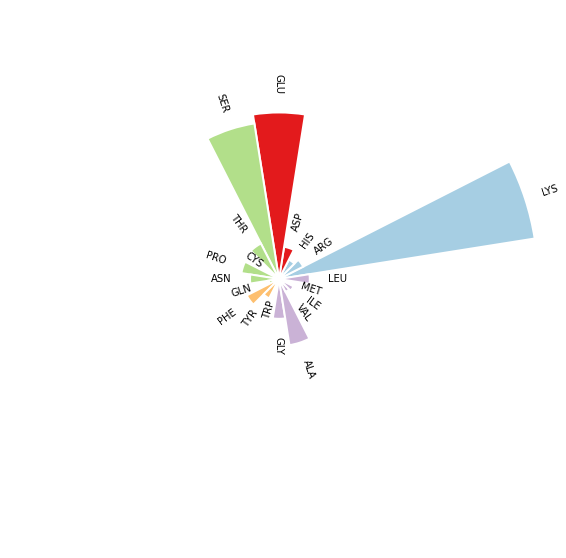

In [42]:


# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_osh4_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_osh4_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_osh4_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_osh4_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.005

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_osh4_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('osh4.png',dpi=330)

In [14]:
df_osh6=pd.read_csv('../osh6/osh6_100dopc_prolint.csv', sep='\t')
df_osh6_ordered=df_osh6[df_osh6.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_osh6_ordered_select=df_osh6_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_osh6_grouped=df_osh6_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_osh6_grouped.to_csv('osh6.csv',sep='\t')
df_osh6_f=pd.read_csv('osh6.csv',sep='\t')
df_osh6_f=df_osh6_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_osh6_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
if df_osh6_f.shape[0]<20:
    print("MISSING AMINOACID")
df_osh6_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.1730
1,R,ARG,0.1235
8,H,HIS,0.0295
3,D,ASP,0.0350
6,E,GLU,0.0410
15,S,SER,0.0900
16,T,THR,0.0955
4,C,CYS,0.0020
14,P,PRO,0.0570
2,N,ASN,0.0625


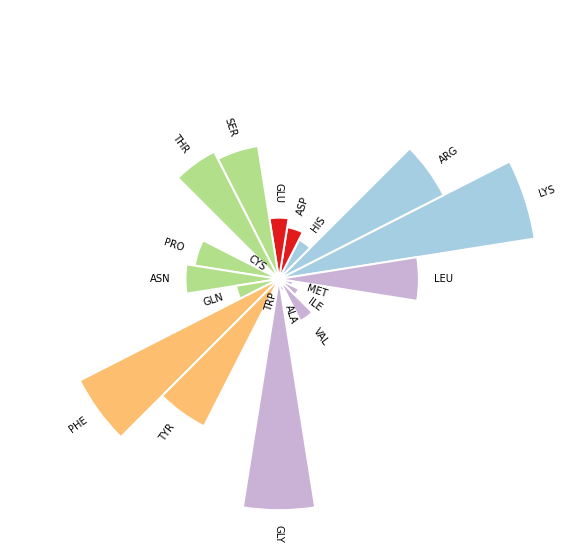

In [39]:


# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_osh6_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_osh6_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_osh6_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_osh6_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.01

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_osh6_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('osh6.png',dpi=330)

In [15]:
df_smp=pd.read_csv('../smp/smp_100dopc_prolint.csv', sep='\t')
df_smp_ordered=df_smp[df_smp.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_smp_ordered_select=df_smp_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_smp_grouped=df_smp_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_smp_grouped.to_csv('smp.csv',sep='\t')
df_smp_f=pd.read_csv('smp.csv',sep='\t')
df_smp_f=df_smp_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_smp_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
if df_smp_f.shape[0]<20:
    print("MISSING AMINOACID")
df_smp_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.0440
1,R,ARG,0.0765
8,H,HIS,0.0195
3,D,ASP,0.0250
6,E,GLU,0.0160
15,S,SER,0.0310
16,T,THR,0.0870
4,C,CYS,0.0300
14,P,PRO,0.0270
2,N,ASN,0.0865


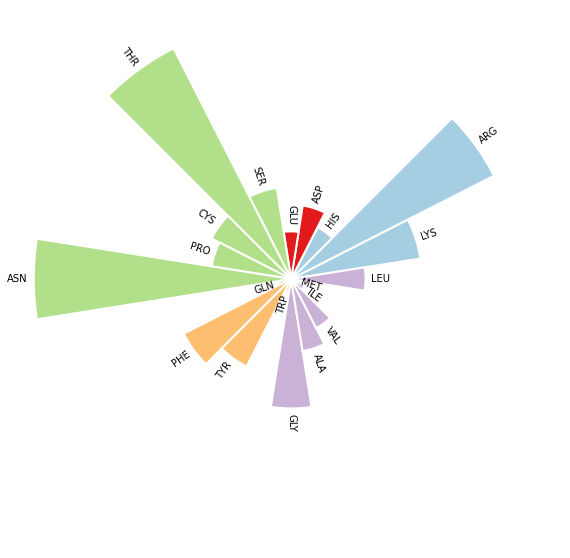

In [277]:

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_smp_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_smp_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_smp_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_smp_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.002

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_smp_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('smp.png',dpi=330)

In [16]:
#REDO SINCE NO TRP
df_sfh1=pd.read_csv('../sfh1_3b74/sfh1_100dopc_prolint.csv', sep='\t')
df_sfh1_ordered=df_sfh1[df_sfh1.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_sfh1_ordered_select=df_sfh1_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_sfh1_grouped=df_sfh1_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_sfh1_grouped.to_csv('sfh1.csv',sep='\t')
df_sfh1_f=pd.read_csv('sfh1.csv',sep='\t')
df_sfh1_f=df_sfh1_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_sfh1_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_sfh1_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.0775
1,R,ARG,0.0305
8,H,HIS,0.0495
3,D,ASP,0.0055
6,E,GLU,0.0150
15,S,SER,0.0935
16,T,THR,0.0275
4,C,CYS,0.0005
14,P,PRO,0.0360
2,N,ASN,0.0170


In [17]:
#if all amino acids are present, 11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10
#                             = LYS,ARG,HIS,ASP,GLU,SER,THR,CYS,PRO,ASN,GLN,PHE,TYR,TRP,GLY,ALA,VAL,ILE,MET,LEU

#if TRP is missing, introduce a line for it at the appropriate postion, like here row 17 must have been TRP, thus 
#insert row at 16.5 and then reset index so 16.5 becomes the new 17
df_sfh1_f=pd.read_csv('sfh1.csv',sep='\t')
df_sfh1_f.loc[16.5] = 'TRP', 0.0
df_sfh1_f = df_sfh1_f.sort_index().reset_index(drop=True)
df_sfh1_f=df_sfh1_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_sfh1_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_sfh1_f


,Letter,ResName,Longest_Duration
11,K,LYS,0.0775
1,R,ARG,0.0305
8,H,HIS,0.0495
3,D,ASP,0.0055
6,E,GLU,0.0150
15,S,SER,0.0935
16,T,THR,0.0275
4,C,CYS,0.0005
14,P,PRO,0.0360
2,N,ASN,0.0170


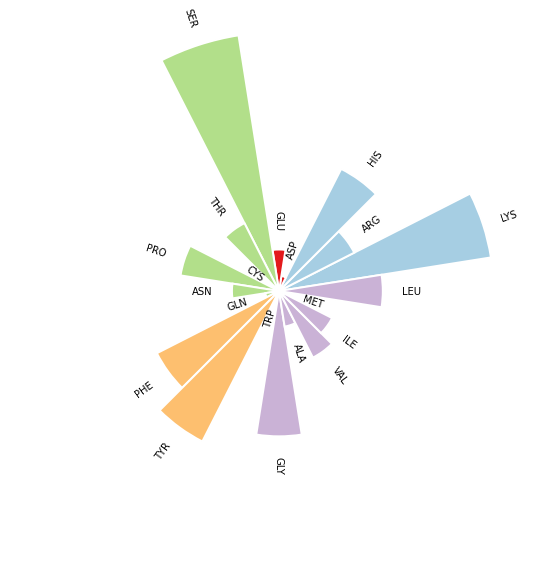

In [397]:


# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_sfh1_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_sfh1_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_sfh1_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_sfh1_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.007

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_sfh1_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('sfh1.png',dpi=330)

In [18]:
df_ttpa=pd.read_csv('../ttpa/ttpa_100dopc_prolint.csv', sep='\t')
df_ttpa_ordered=df_ttpa[df_ttpa.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_ttpa_ordered_select=df_ttpa_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_ttpa_grouped=df_ttpa_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_ttpa_grouped.to_csv('ttpa.csv',sep='\t')
df_ttpa_f=pd.read_csv('ttpa.csv',sep='\t')
df_ttpa_f=df_ttpa_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_ttpa_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_ttpa_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.3140
1,R,ARG,0.0125
8,H,HIS,0.2120
3,D,ASP,0.0115
6,E,GLU,0.1230
15,S,SER,0.2725
16,T,THR,0.2830
4,C,CYS,0.0045
14,P,PRO,0.3490
2,N,ASN,0.0680


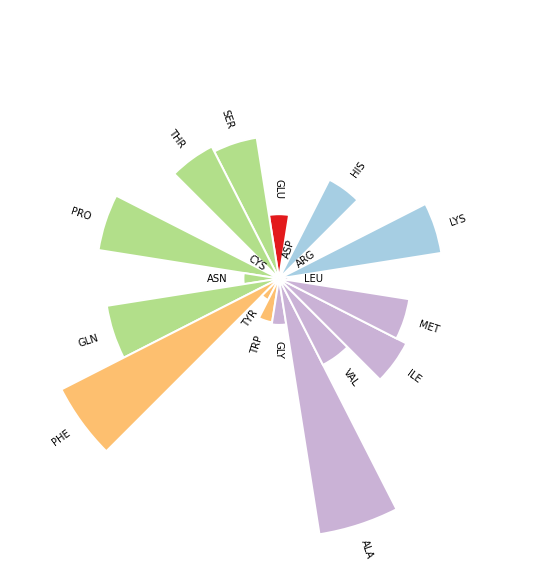

In [282]:


# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_ttpa_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_ttpa_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_ttpa_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_ttpa_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.03

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_ttpa_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('ttpa.png',dpi=330)

In [19]:
df_pitpa=pd.read_csv('../pitpa/pitpa_100dopc_prolint.xvg', sep='\t')
df_pitpa_ordered=df_pitpa[df_pitpa.Lipids == "DOPC"].sort_values('Longest_Duration', ascending=False)
df_pitpa_ordered_select=df_pitpa_ordered[['ResName', 'ResID', 'Longest_Duration']]
df_pitpa_grouped=df_pitpa_ordered_select.groupby('ResName')['Longest_Duration'].sum()
df_pitpa_grouped.to_csv('pitpa.csv',sep='\t')
df_pitpa_f=pd.read_csv('pitpa.csv',sep='\t')
df_pitpa_f=df_pitpa_f.reindex([11,1,8,3,6,15,16,4,14,2,5,13,18,17,7,0,19,9,12,10])
df_pitpa_f.insert(0, "Letter", ['K','R','H','D','E','S','T','C','P','N','Q','F','Y','W','G','A','V','I','M','L'])
df_pitpa_f

,Letter,ResName,Longest_Duration
11,K,LYS,0.3235
1,R,ARG,0.0535
8,H,HIS,0.0155
3,D,ASP,0.0720
6,E,GLU,0.0800
15,S,SER,0.0320
16,T,THR,0.0765
4,C,CYS,0.0005
14,P,PRO,0.0770
2,N,ASN,0.1125


In [46]:
df_pitpa_grouped

ResName
ALA    0.0575
ARG    0.0535
ASN    0.1125
ASP    0.0720
CYS    0.0005
GLN    0.1215
GLU    0.0800
GLY    0.1070
HIS    0.0155
ILE    0.0045
LEU    0.0975
LYS    0.3235
MET    0.0775
PHE    0.1665
PRO    0.0770
SER    0.0320
THR    0.0765
TRP    0.1645
TYR    0.0740
VAL    0.0390
Name: Longest_Duration, dtype: float64

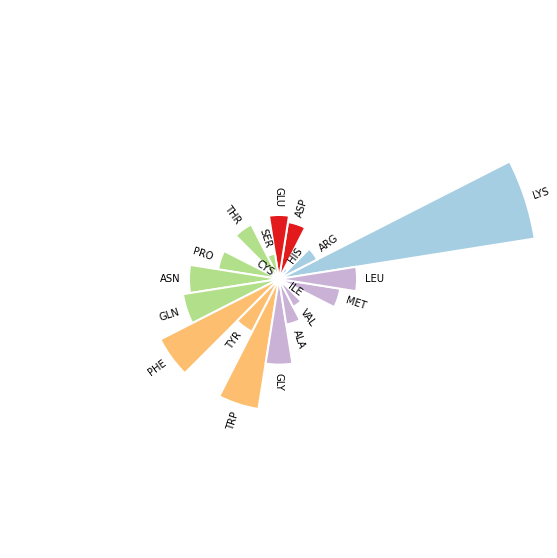

In [285]:


# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_pitpa_f['Longest_Duration'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_pitpa_f['Longest_Duration'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_pitpa_f['Longest_Duration'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_pitpa_f['Longest_Duration'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.01

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_pitpa_f['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('pitpa.png',dpi=330)

In [43]:
data_frames = [df_astera_f, df_asterc_f, df_cptp_f, df_smp_f, df_fabp_f, df_gm2a_f,df_lcn1_f,df_osh4_f,df_osh6_f, df_pitpa_f,df_sfh1_f, df_ttpa_f]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['ResName'],
                                            how='outer'), data_frames)
df_merged

<ipython-input-43-a356d66283c7>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Letter_x', 'Longest_Duration_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['ResName'],
<ipython-input-43-a356d66283c7>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Letter_x', 'Longest_Duration_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['ResName'],
<ipython-input-43-a356d66283c7>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Letter_x', 'Longest_Duration_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['ResName'],
<ipython-input-43-a356d66283c7>:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Letter_x', 'Longest_Duration_x'} in

,Letter_x,ResName,Longest_Duration_x,Letter_y,Longest_Duration_y,Letter_x,Longest_Duration_x,Letter_y,Longest_Duration_y,Letter_x,...,Letter_y,Longest_Duration_y,Letter_x,Longest_Duration_x,Letter_y,Longest_Duration_y,Letter_x,Longest_Duration_x,Letter_y,Longest_Duration_y
0,K,LYS,0.1385,K,0.3515,K,0.0570,K,0.0440,K,...,K,0.0715,K,0.1730,K,0.3235,K,0.0775,K,0.3140
1,R,ARG,0.0365,R,0.0305,R,0.2080,R,0.0765,R,...,R,0.0075,R,0.1235,R,0.0535,R,0.0305,R,0.0125
2,H,HIS,0.0095,H,0.0830,H,0.0645,H,0.0195,H,...,H,0.0060,H,0.0295,H,0.0155,H,0.0495,H,0.2120
3,D,ASP,0.0200,D,0.0530,D,0.0235,D,0.0250,D,...,D,0.0090,D,0.0350,D,0.0720,D,0.0055,D,0.0115
4,E,GLU,0.0095,E,0.0255,E,0.0295,E,0.0160,E,...,E,0.0460,E,0.0410,E,0.0800,E,0.0150,E,0.1230
5,S,SER,0.1240,S,0.2510,S,0.1065,S,0.0310,S,...,S,0.0435,S,0.0900,S,0.0320,S,0.0935,S,0.2725
6,T,THR,0.0055,T,0.1030,T,0.1650,T,0.0870,T,...,T,0.0110,T,0.0955,T,0.0765,T,0.0275,T,0.2830
7,C,CYS,0.0035,C,0.0075,C,0.0645,C,0.0300,C,...,C,0.0010,C,0.0020,C,0.0005,C,0.0005,C,0.0045
8,P,PRO,0.0655,P,0.1505,P,0.0865,P,0.0270,P,...,P,0.0105,P,0.0570,P,0.0770,P,0.0360,P,0.3490
9,N,ASN,0.0325,N,0.1260,N,0.0550,N,0.0865,N,...,N,0.0080,N,0.0625,N,0.1125,N,0.0170,N,0.0680


In [44]:
# df_merged2 = df_merged.drop('ResName', 1)
df_merged2 = df_merged.drop('Letter_y', 1)
df_merged2 = df_merged2.drop('Letter_x', 1)
# df_merged2=df_merged2.drop([20])
df_merged2

<ipython-input-44-b1e512d9b3a8>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_merged2 = df_merged.drop('Letter_y', 1)
<ipython-input-44-b1e512d9b3a8>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_merged2 = df_merged2.drop('Letter_x', 1)


,ResName,Longest_Duration_x,Longest_Duration_y,Longest_Duration_x,Longest_Duration_y,Longest_Duration_x,Longest_Duration_y,Longest_Duration_x,Longest_Duration_y,Longest_Duration_x,Longest_Duration_y,Longest_Duration_x,Longest_Duration_y
0,LYS,0.1385,0.3515,0.0570,0.0440,0.1170,0.4255,0.0320,0.0715,0.1730,0.3235,0.0775,0.3140
1,ARG,0.0365,0.0305,0.2080,0.0765,0.0350,0.0310,0.0335,0.0075,0.1235,0.0535,0.0305,0.0125
2,HIS,0.0095,0.0830,0.0645,0.0195,0.0210,0.1020,0.0175,0.0060,0.0295,0.0155,0.0495,0.2120
3,ASP,0.0200,0.0530,0.0235,0.0250,0.0380,1.0405,0.0070,0.0090,0.0350,0.0720,0.0055,0.0115
4,GLU,0.0095,0.0255,0.0295,0.0160,0.0100,1.3510,0.0320,0.0460,0.0410,0.0800,0.0150,0.1230
5,SER,0.1240,0.2510,0.1065,0.0310,0.0660,1.1510,0.0240,0.0435,0.0900,0.0320,0.0935,0.2725
6,THR,0.0055,0.1030,0.1650,0.0870,0.1255,1.3470,0.0195,0.0110,0.0955,0.0765,0.0275,0.2830
7,CYS,0.0035,0.0075,0.0645,0.0300,0.0010,0.7030,0.0055,0.0010,0.0020,0.0005,0.0005,0.0045
8,PRO,0.0655,0.1505,0.0865,0.0270,0.0015,1.8530,0.0105,0.0105,0.0570,0.0770,0.0360,0.3490
9,ASN,0.0325,0.1260,0.0550,0.0865,0.0240,0.0395,0.0065,0.0080,0.0625,0.1125,0.0170,0.0680


In [45]:
df_merged2['mean'] = df_merged2.mean(axis=1)
df_merged2

<ipython-input-45-e8ce29bfa70b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_merged2['mean'] = df_merged2.mean(axis=1)


,ResName,Longest_Duration_x,Longest_Duration_y,Longest_Duration_x,Longest_Duration_y,Longest_Duration_x,Longest_Duration_y,Longest_Duration_x,Longest_Duration_y,Longest_Duration_x,Longest_Duration_y,Longest_Duration_x,Longest_Duration_y,mean
0,LYS,0.1385,0.3515,0.0570,0.0440,0.1170,0.4255,0.0320,0.0715,0.1730,0.3235,0.0775,0.3140,0.177083
1,ARG,0.0365,0.0305,0.2080,0.0765,0.0350,0.0310,0.0335,0.0075,0.1235,0.0535,0.0305,0.0125,0.056542
2,HIS,0.0095,0.0830,0.0645,0.0195,0.0210,0.1020,0.0175,0.0060,0.0295,0.0155,0.0495,0.2120,0.052458
3,ASP,0.0200,0.0530,0.0235,0.0250,0.0380,1.0405,0.0070,0.0090,0.0350,0.0720,0.0055,0.0115,0.111667
4,GLU,0.0095,0.0255,0.0295,0.0160,0.0100,1.3510,0.0320,0.0460,0.0410,0.0800,0.0150,0.1230,0.148208
5,SER,0.1240,0.2510,0.1065,0.0310,0.0660,1.1510,0.0240,0.0435,0.0900,0.0320,0.0935,0.2725,0.190417
6,THR,0.0055,0.1030,0.1650,0.0870,0.1255,1.3470,0.0195,0.0110,0.0955,0.0765,0.0275,0.2830,0.195500
7,CYS,0.0035,0.0075,0.0645,0.0300,0.0010,0.7030,0.0055,0.0010,0.0020,0.0005,0.0005,0.0045,0.068625
8,PRO,0.0655,0.1505,0.0865,0.0270,0.0015,1.8530,0.0105,0.0105,0.0570,0.0770,0.0360,0.3490,0.227000
9,ASN,0.0325,0.1260,0.0550,0.0865,0.0240,0.0395,0.0065,0.0080,0.0625,0.1125,0.0170,0.0680,0.053167


In [46]:
df_merged2_select=df_merged2[['ResName', 'mean']]
df_merged2_select

,ResName,mean
0,LYS,0.177083
1,ARG,0.056542
2,HIS,0.052458
3,ASP,0.111667
4,GLU,0.148208
5,SER,0.190417
6,THR,0.195500
7,CYS,0.068625
8,PRO,0.227000
9,ASN,0.053167


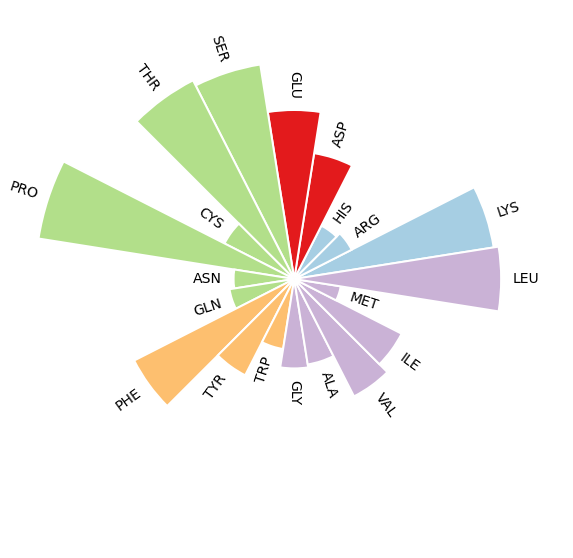

In [55]:
#use line below to see where most of your data is; as long as most of it is near zero it is okay to avg over residues i guess
# df_ordered_select.plot.hist(y='mean',style='.-')

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 1
lowerLimit = 0

# Compute max and min in the dataset
max = df_merged2_select['mean'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_merged2_select['mean'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_merged2_select['mean'].index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_merged2_select['mean'].index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2,
    alpha=1,
    color=color1,
    edgecolor="white")

# little space between the bar and the label
labelPadding = 0.01

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_merged2_select['ResName']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        size=14,
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('/home/srinivasans/Desktop/flex_memb_binding_correlation/cg_prot_memb/martini_v300/100dopc/analysis_amino_acid_composition/mean.png',dpi=330)

In [22]:
#SPLITTING THE DATA INTO QUARTILES
# q = pd.cut(df_ordered_select["Longest_Duration"],4)
# q

156       (0.0484, 0.0645]
157       (0.0484, 0.0645]
152       (0.0484, 0.0645]
142       (0.0484, 0.0645]
149       (0.0484, 0.0645]
              ...         
32     (-6.45e-05, 0.0161]
33     (-6.45e-05, 0.0161]
36     (-6.45e-05, 0.0161]
131    (-6.45e-05, 0.0161]
104    (-6.45e-05, 0.0161]
Name: Longest_Duration, Length: 208, dtype: category
Categories (4, interval[float64, right]): [(-6.45e-05, 0.0161] < (0.0161, 0.0322] < (0.0322, 0.0484] < (0.0484, 0.0645]]